In [1]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers.legacy import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from sklearn import metrics

In [2]:
audio_dataset_path = 'UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

### MFCC Visualization


In [4]:
plt.rcParams["figure.figsize"] = (4, 2)
plt.rcParams["figure.dpi"] = 200

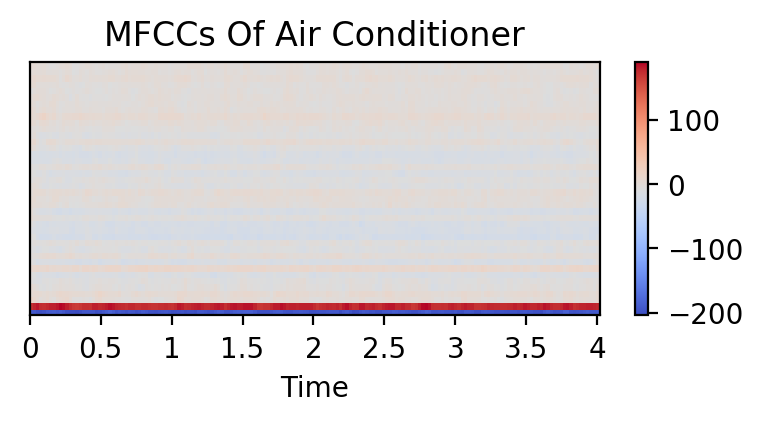

In [5]:
audio_ac = audio_dataset_path + "fold1/134717-0-0-20.wav"
(signal, sr) = librosa.load(audio_ac)
mfccs_ac = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs_ac, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCCs Of Air Conditioner")
plt.show()

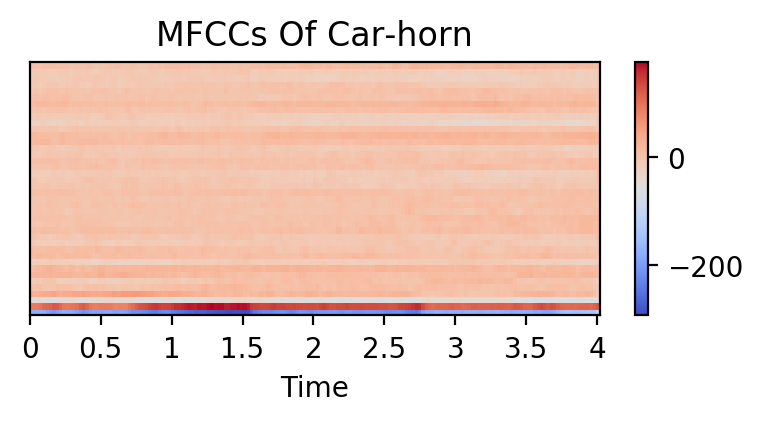

In [6]:
audio_car_horn = audio_dataset_path + "fold1/24074-1-0-1.wav"
(signal, sr) = librosa.load(audio_car_horn)
mfccs_car_horn = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs_car_horn, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCCs Of Car-horn")
plt.show()

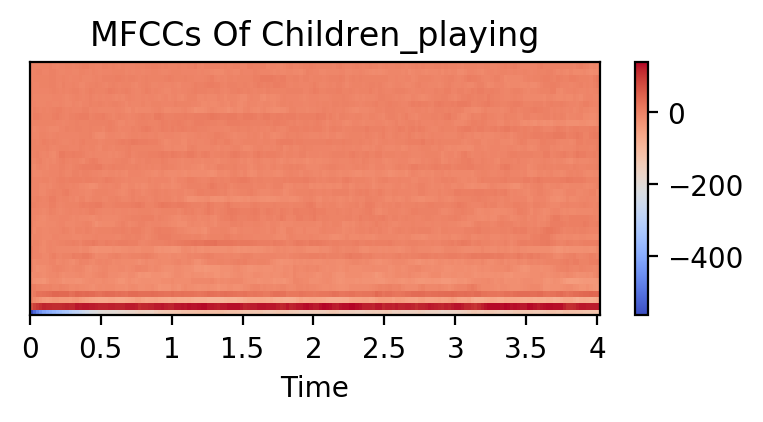

In [7]:
audio_children = audio_dataset_path + "fold1/15564-2-0-0.wav"
(signal, sr) = librosa.load(audio_children)
mfccs_children = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs_children, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCCs Of Children_playing")
plt.show()

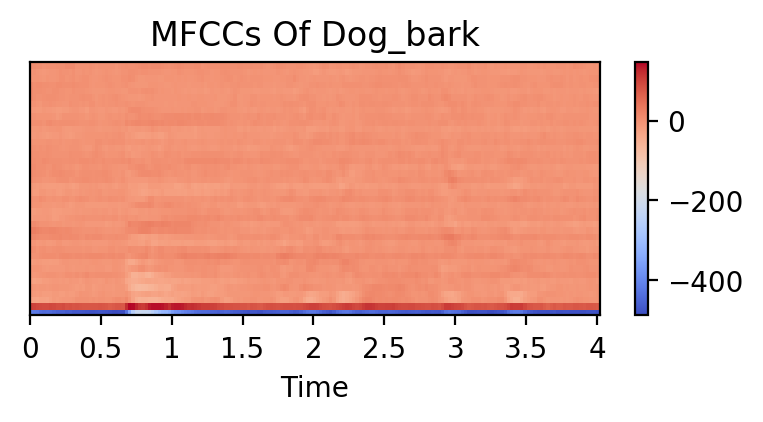

In [8]:
audio_dog = audio_dataset_path + "fold1/72261-3-0-23.wav"
(signal, sr) = librosa.load(audio_dog)
mfccs_dog = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs_dog, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCCs Of Dog_bark")
plt.show()

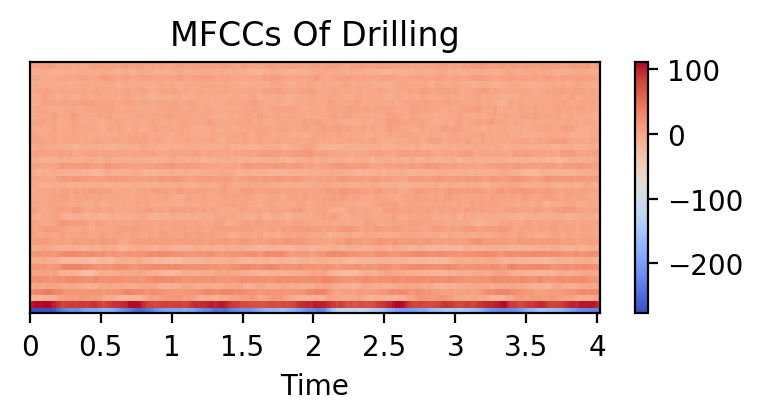

In [9]:
audio_drilling = audio_dataset_path + "fold1/17913-4-0-0.wav"
(signal, sr) = librosa.load(audio_drilling)
mfccs_drilling = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs_drilling, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCCs Of Drilling")
plt.show()

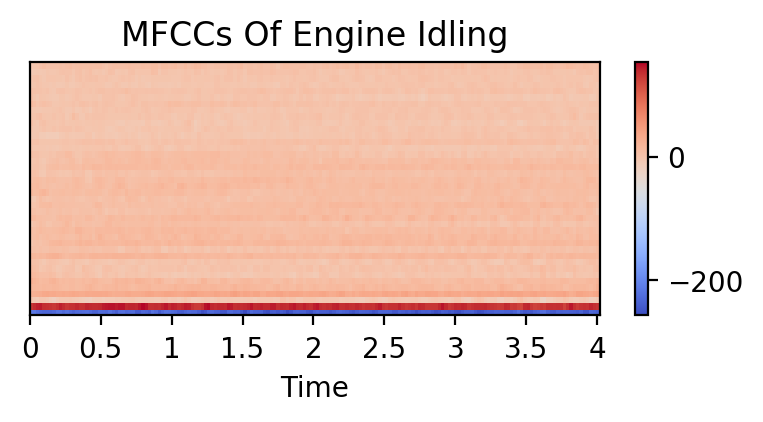

In [10]:
audio_engine = audio_dataset_path + "fold1/17592-5-1-0.wav"
(signal, sr) = librosa.load(audio_engine)
mfccs_engine = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs_engine, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCCs Of Engine Idling")
plt.show()

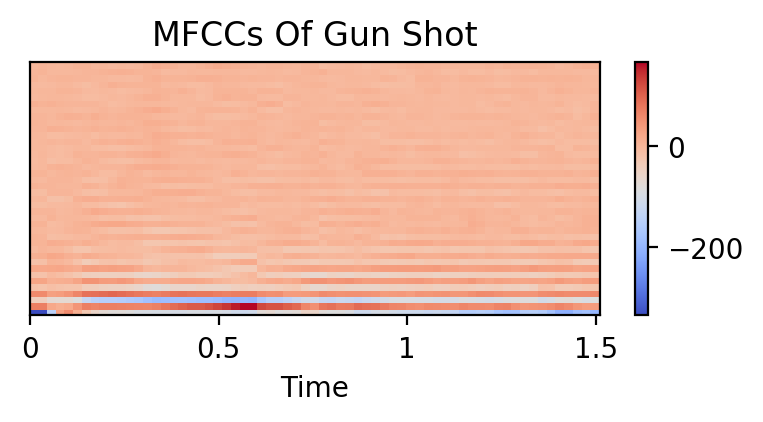

In [11]:
audio_gun = audio_dataset_path + "fold1/46656-6-2-0.wav"
(signal, sr) = librosa.load(audio_gun)
mfccs_gun = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs_gun, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCCs Of Gun Shot")
plt.show()

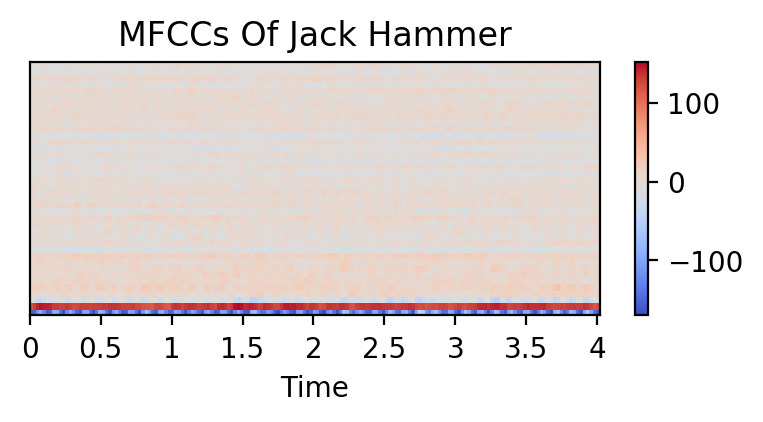

In [12]:
audio_j_ham = audio_dataset_path + "fold1/180937-7-2-7.wav"
(signal, sr) = librosa.load(audio_j_ham)
mfccs_j_ham = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs_j_ham, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCCs Of Jack Hammer")
plt.show()

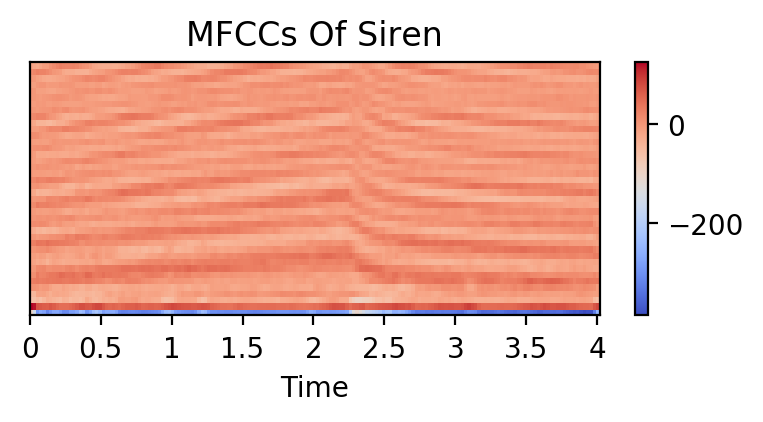

In [13]:
audio_siren = audio_dataset_path + "fold1/157867-8-0-14.wav"
(signal, sr) = librosa.load(audio_siren)
mfccs_siren = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs_siren, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCCs Of Siren")
plt.show()

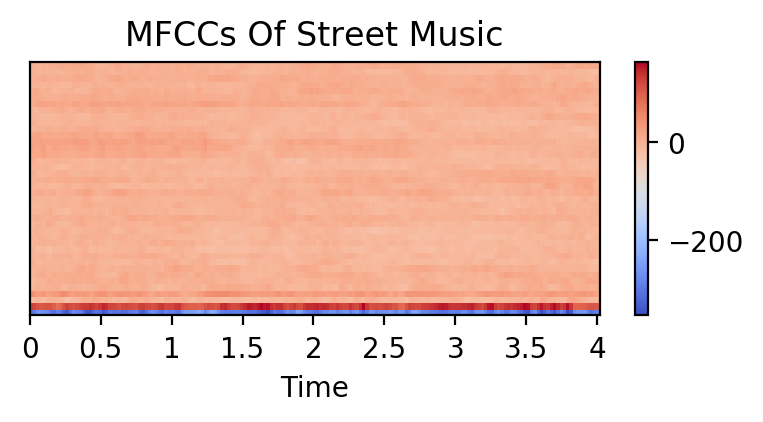

In [14]:
audio_streetmusic = audio_dataset_path + "fold1/161702-9-0-6.wav"
(signal, sr) = librosa.load(audio_streetmusic)
mfccs_streetmusic = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs_streetmusic, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCCs Of Street Music")
plt.show()

### Data Pre-Processing

In [15]:
def feature_extractor(file):
    audio,sr = librosa.load(file,res_type='kaiser_fast')
    mfcc_features = librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=40)
    mfcc_features_scaled = np.mean(mfcc_features.T,axis=0)
    
    return mfcc_features_scaled

In [16]:
import numpy as np
from tqdm import tqdm

# Now we iterate through every audio file and extract features
# using mel-frequency cepstral co-efficients

extracted_features = []
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["fold"]) + '/',str(row["slice_file_name"]))
    final_class_labels = row['class']
    data = feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    

3555it [03:54, 13.96it/s]C:\Users\NACHIKET MOHANTY\anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8325it [08:56, 21.27it/s]C:\Users\NACHIKET MOHANTY\anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
C:\Users\NACHIKET MOHANTY\anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [09:21, 15.55it/s]


In [17]:
#converting extracted_features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
# Storing the dataframe to pickle for further processing
extracted_features_df.to_pickle("extracted_df.pkl")
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091335,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [18]:
# Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
Y = np.array(extracted_features_df['class'].tolist())

In [19]:
X.shape

(8732, 40)

In [20]:
Y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [21]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = to_categorical(labelencoder.fit_transform(Y))

In [22]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
X_train.shape

(6985, 40)

In [25]:
X_test.shape

(1747, 40)

In [26]:
Y_train.shape

(6985, 10)

In [27]:
Y_test.shape

(1747, 10)

### Model Creation

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [29]:
num_label = Y.shape[1]

In [33]:
def create_model():
    model = Sequential()
    
    #first layer
    model.add(Dense(750, input_shape=(40,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    #second layer
    model.add(Dense(500))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    #third layer
    model.add(Dense(250))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
     #fourth layer
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    #final layer
    model.add(Dense(num_label))
    model.add(Activation('softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])

    
    return model

In [34]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 750)               30750     
                                                                 
 activation (Activation)     (None, 750)               0         
                                                                 
 dropout (Dropout)           (None, 750)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               375500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               1

In [35]:
# Training the model
from datetime import datetime
start = datetime.now()
history = model.fit(X_train,Y_train,
                   batch_size=32,
                   epochs=100,
                   verbose=2,
                   validation_data=(X_test,Y_test))
duration = datetime.now()-start
print(f"Training the data took {duration} time")

Epoch 1/100
219/219 - 3s - loss: 5.6130 - accuracy: 0.1227 - val_loss: 2.2730 - val_accuracy: 0.1511 - 3s/epoch - 15ms/step
Epoch 2/100
219/219 - 2s - loss: 2.3500 - accuracy: 0.1528 - val_loss: 2.1333 - val_accuracy: 0.2089 - 2s/epoch - 9ms/step
Epoch 3/100
219/219 - 2s - loss: 2.2196 - accuracy: 0.1761 - val_loss: 2.0872 - val_accuracy: 0.3085 - 2s/epoch - 9ms/step
Epoch 4/100
219/219 - 2s - loss: 2.1440 - accuracy: 0.2096 - val_loss: 1.9738 - val_accuracy: 0.3337 - 2s/epoch - 8ms/step
Epoch 5/100
219/219 - 2s - loss: 2.0625 - accuracy: 0.2302 - val_loss: 1.9116 - val_accuracy: 0.3646 - 2s/epoch - 9ms/step
Epoch 6/100
219/219 - 2s - loss: 1.9982 - accuracy: 0.2597 - val_loss: 1.8381 - val_accuracy: 0.3709 - 2s/epoch - 8ms/step
Epoch 7/100
219/219 - 2s - loss: 1.9511 - accuracy: 0.2836 - val_loss: 1.7032 - val_accuracy: 0.3892 - 2s/epoch - 8ms/step
Epoch 8/100
219/219 - 2s - loss: 1.8259 - accuracy: 0.3327 - val_loss: 1.5512 - val_accuracy: 0.5009 - 2s/epoch - 8ms/step
Epoch 9/100
219

Epoch 67/100
219/219 - 2s - loss: 0.6425 - accuracy: 0.7983 - val_loss: 0.5345 - val_accuracy: 0.8460 - 2s/epoch - 10ms/step
Epoch 68/100
219/219 - 2s - loss: 0.6496 - accuracy: 0.7950 - val_loss: 0.5014 - val_accuracy: 0.8460 - 2s/epoch - 11ms/step
Epoch 69/100
219/219 - 3s - loss: 0.6455 - accuracy: 0.7969 - val_loss: 0.5176 - val_accuracy: 0.8546 - 3s/epoch - 11ms/step
Epoch 70/100
219/219 - 2s - loss: 0.6487 - accuracy: 0.8003 - val_loss: 0.5224 - val_accuracy: 0.8437 - 2s/epoch - 11ms/step
Epoch 71/100
219/219 - 2s - loss: 0.6194 - accuracy: 0.8043 - val_loss: 0.4650 - val_accuracy: 0.8666 - 2s/epoch - 11ms/step
Epoch 72/100
219/219 - 2s - loss: 0.6266 - accuracy: 0.8082 - val_loss: 0.4906 - val_accuracy: 0.8563 - 2s/epoch - 11ms/step
Epoch 73/100
219/219 - 2s - loss: 0.5919 - accuracy: 0.8099 - val_loss: 0.5090 - val_accuracy: 0.8546 - 2s/epoch - 11ms/step
Epoch 74/100
219/219 - 2s - loss: 0.6315 - accuracy: 0.8056 - val_loss: 0.4860 - val_accuracy: 0.8609 - 2s/epoch - 11ms/step


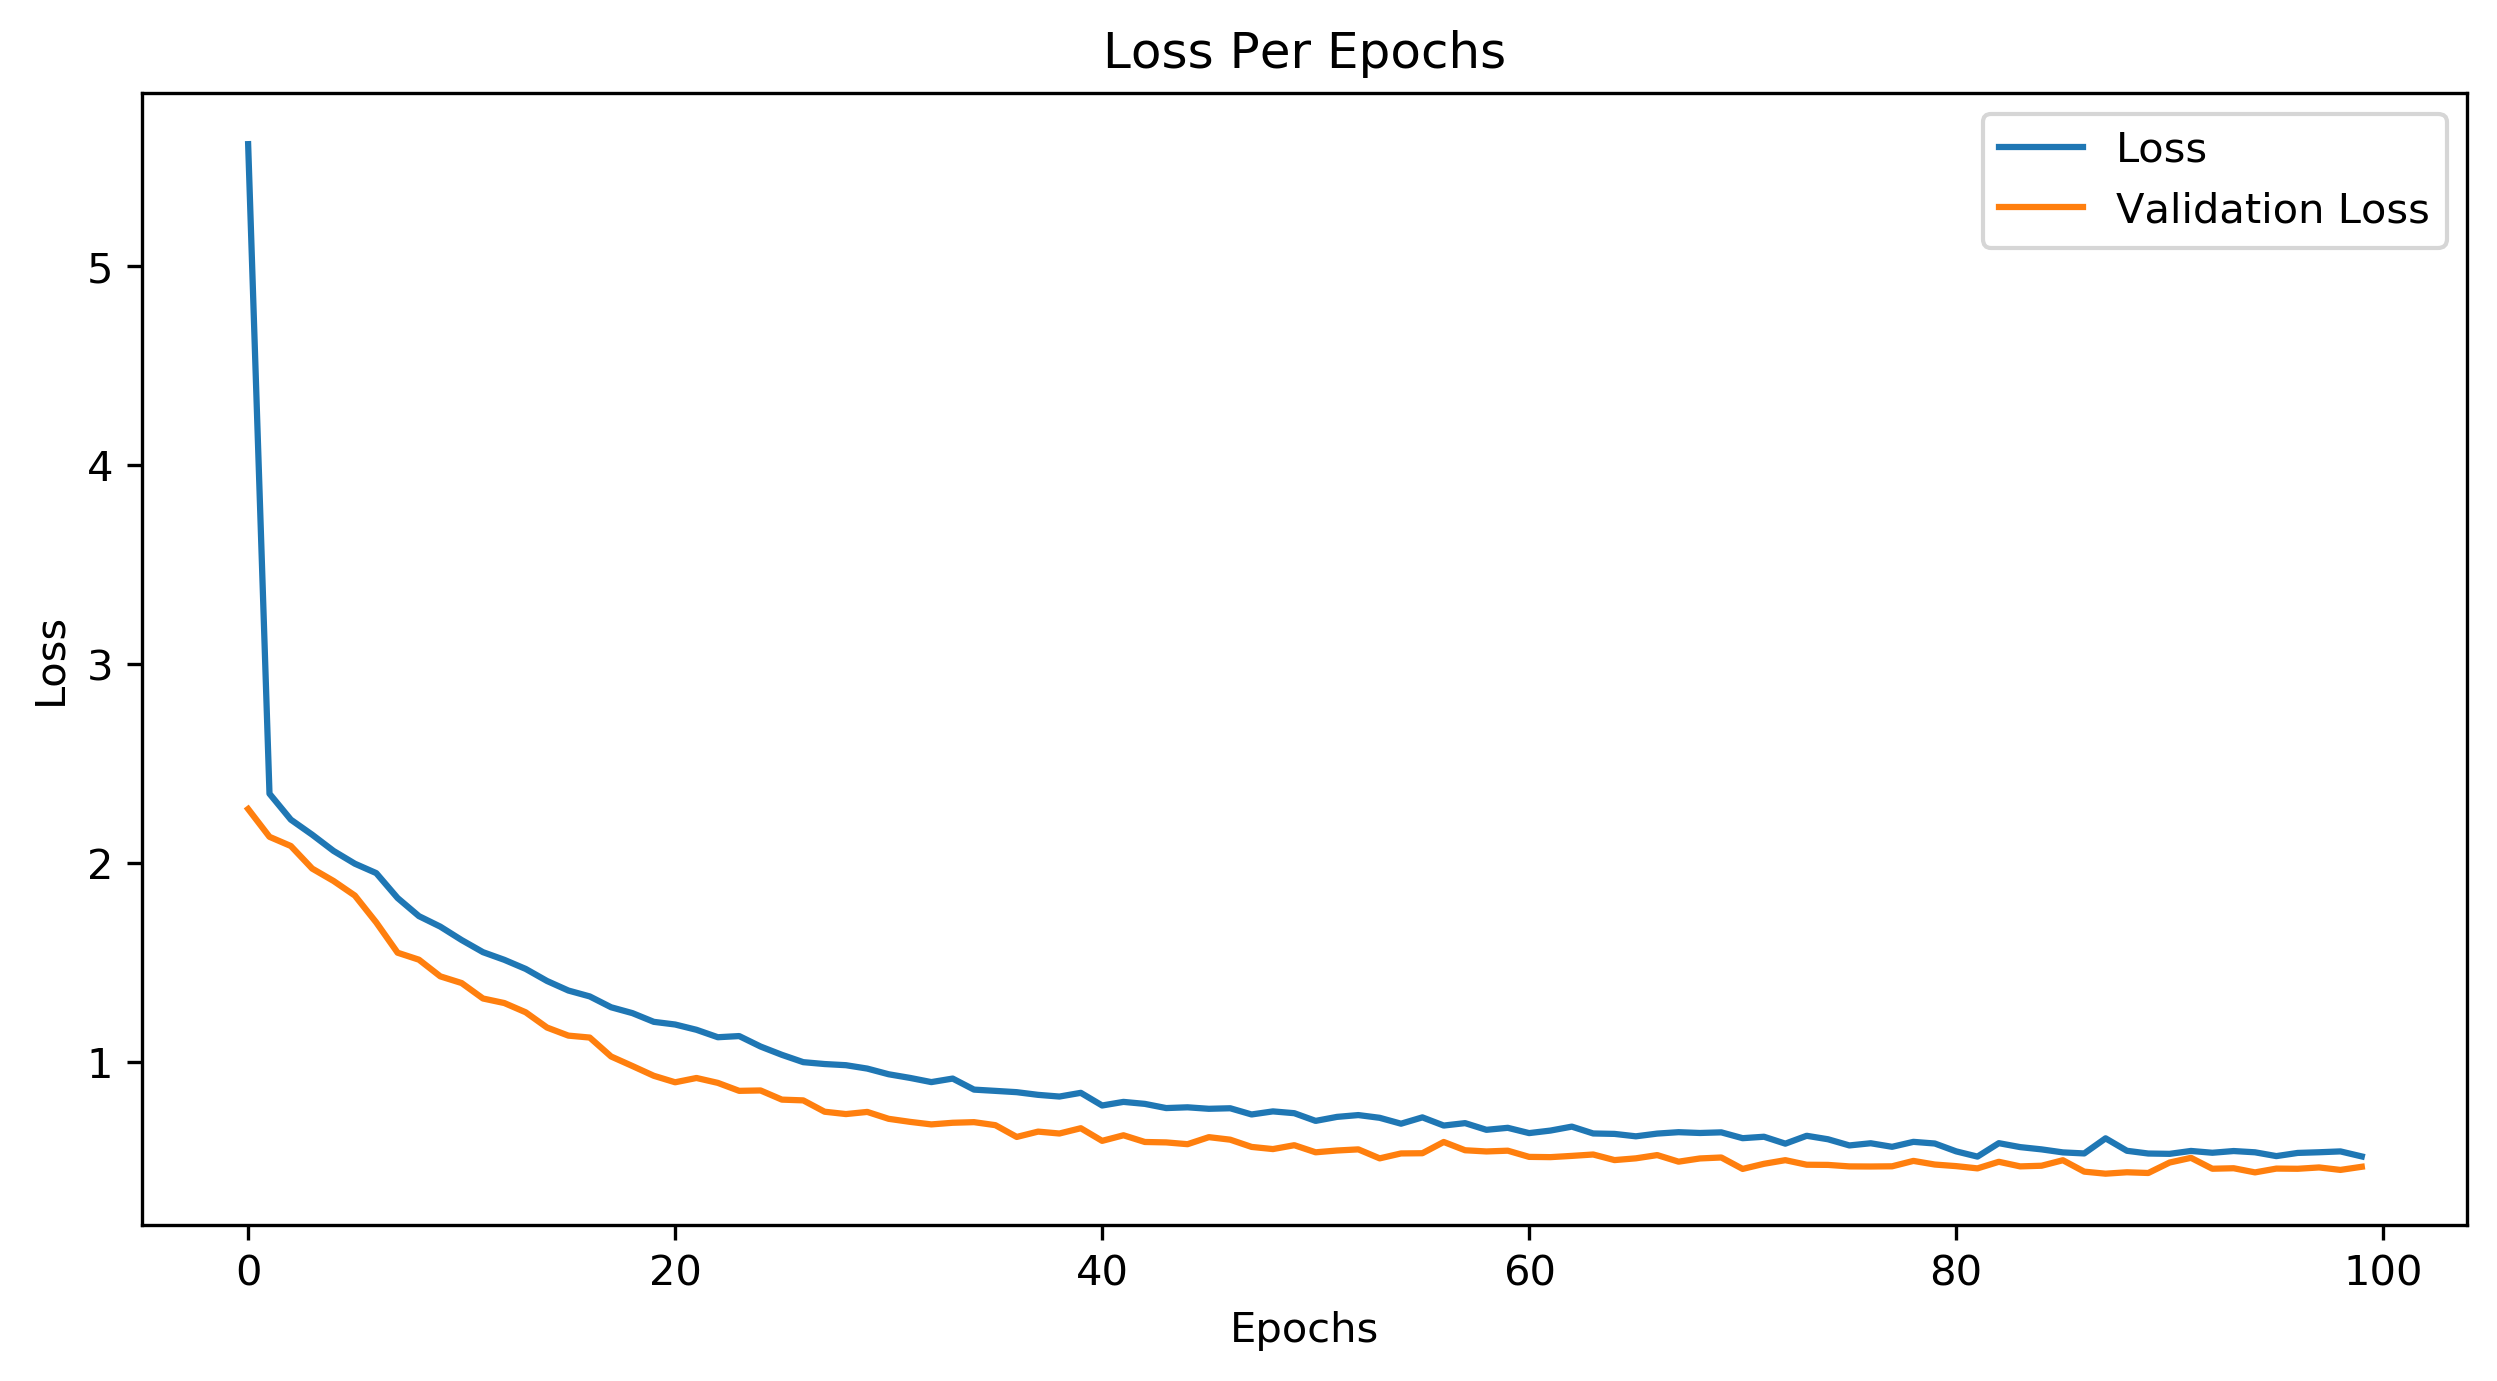

In [36]:
import matplotlib.pyplot as plt
train_history = pd.DataFrame(history.history)
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_history[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

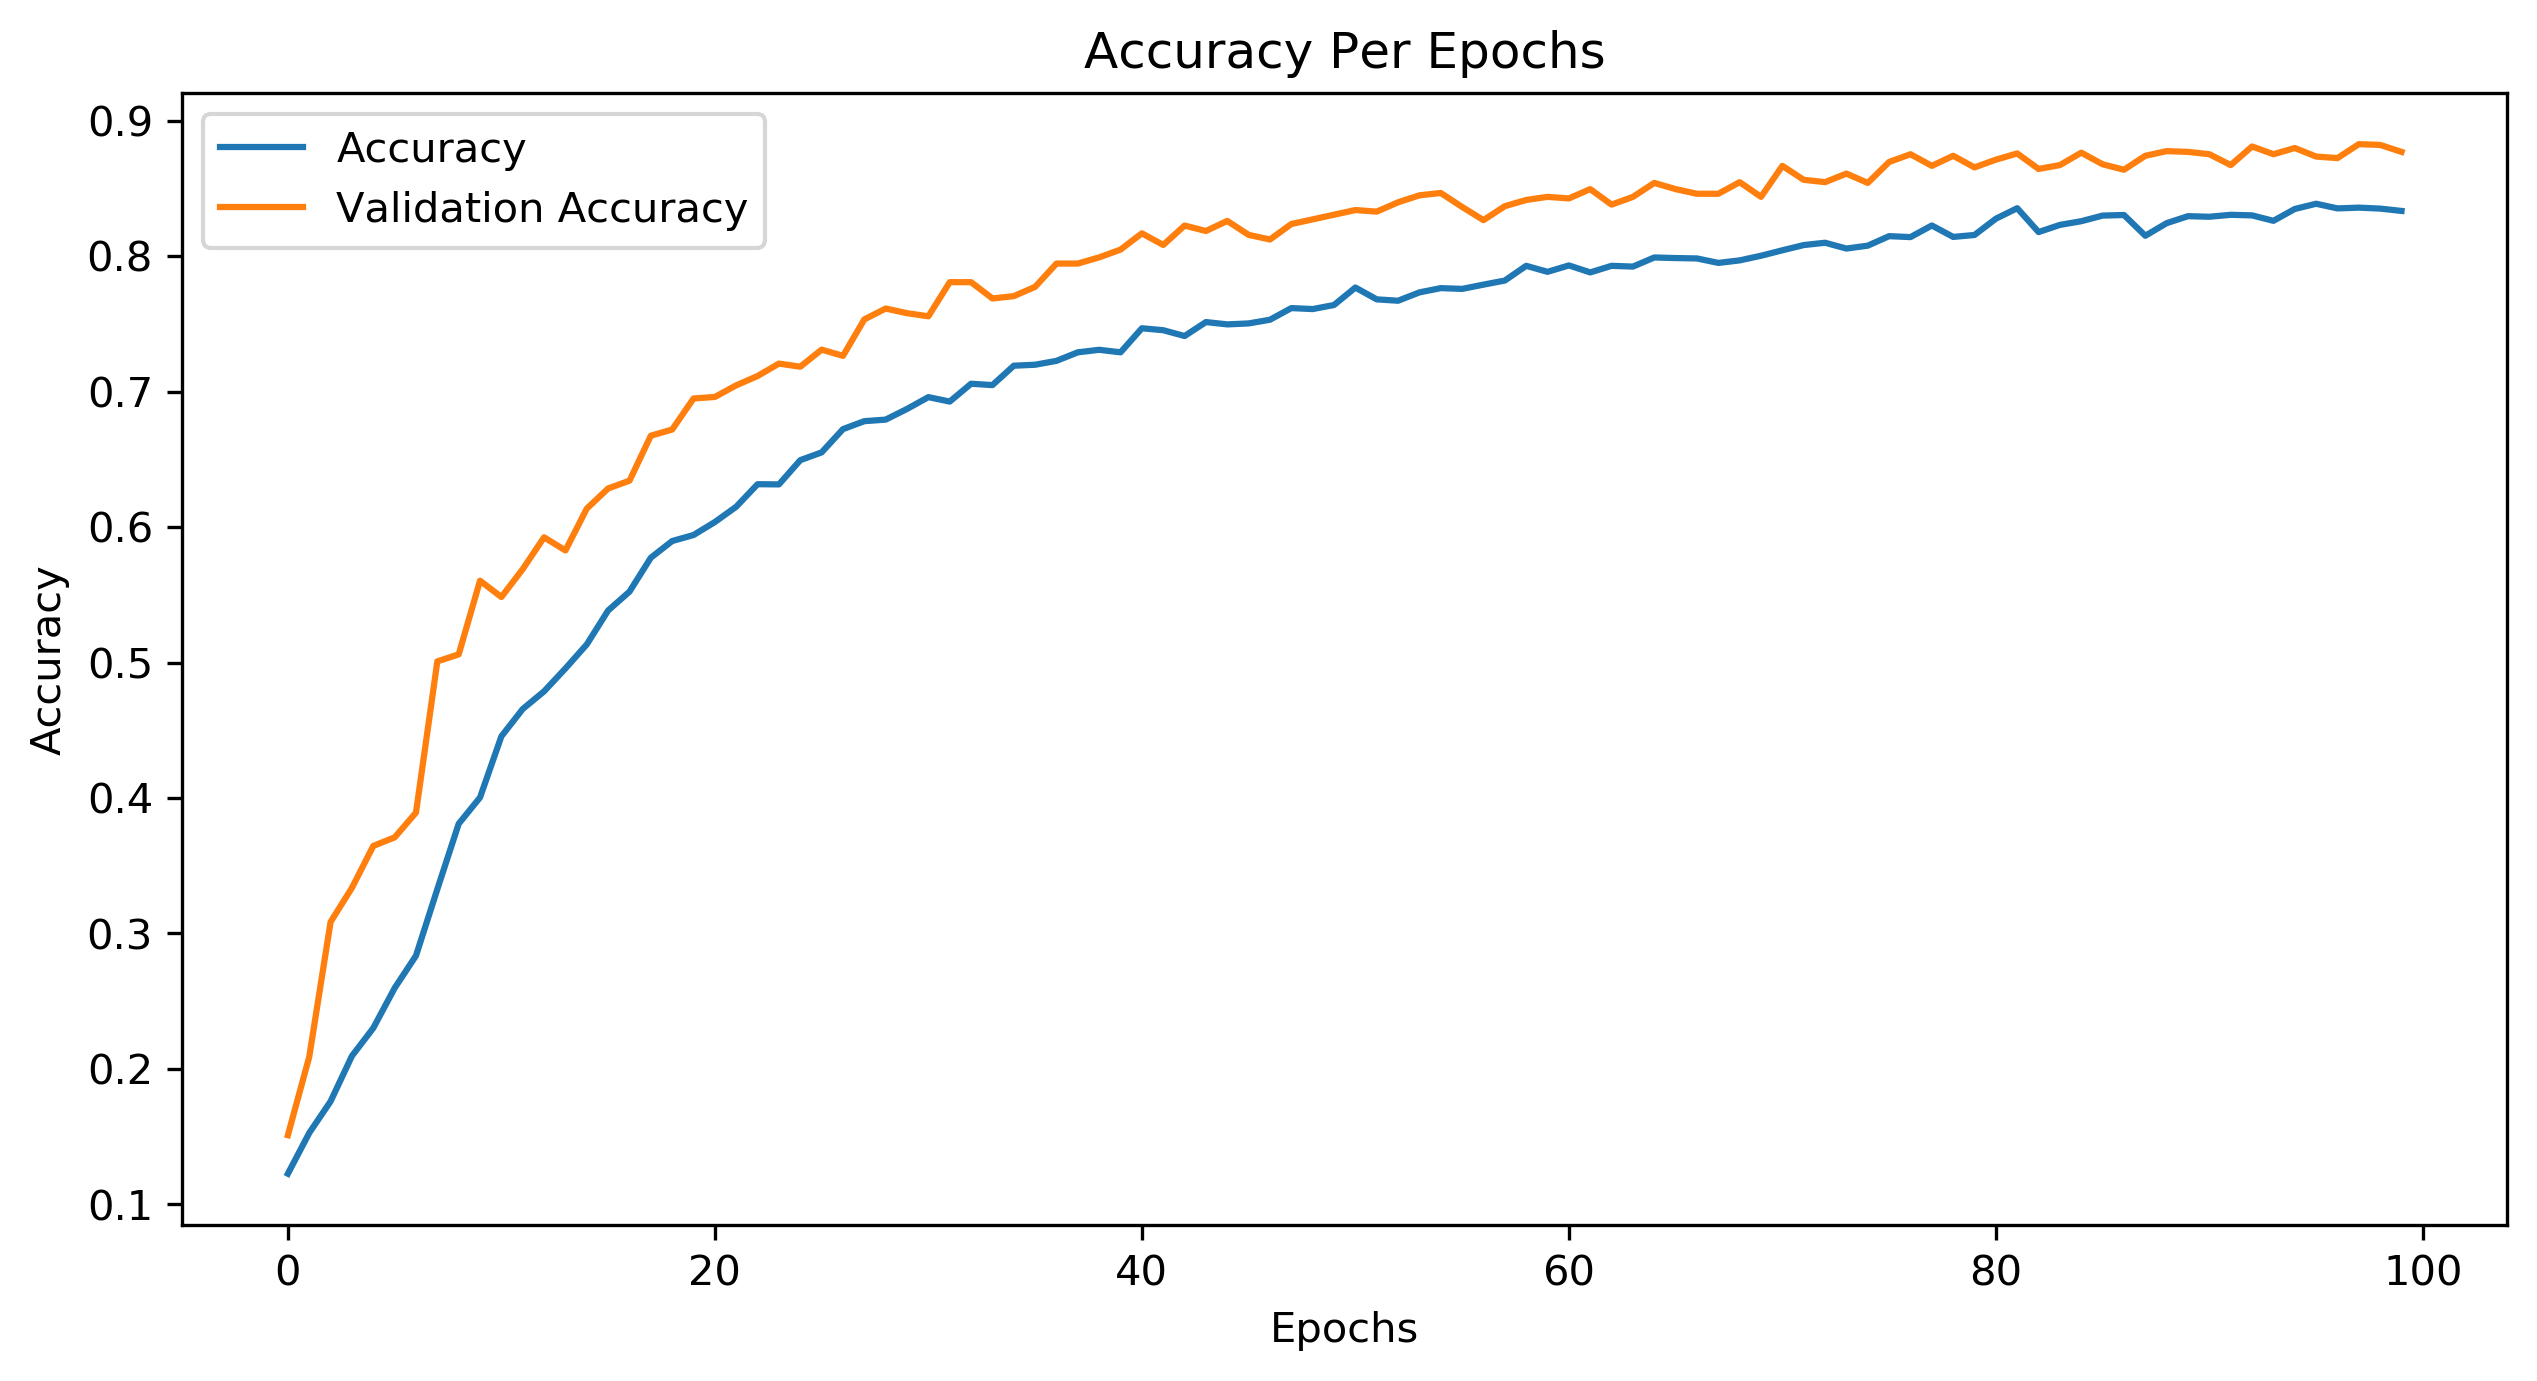

In [37]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_history[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [38]:
test_accuracy = model.evaluate(X_test,Y_test,verbose=0)
print(test_accuracy[1])

0.87693190574646


In [49]:
filename="C:/Users/NACHIKET MOHANTY/Desktop/My Progress/P2 UrbanSound_AudioClassification/UrbanSound8K/15564-2-0-0.wav"

audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

#print(mfccs_scaled_features)
#mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
prediction_feature = np.array([mfccs_scaled_features])
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)

predict_x=model.predict(prediction_feature) 
classes_x=np.argmax(predict_x,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x) 
print(f"The above sound file is of {prediction_class} class.")

1/1 [==============================] - 0s 77ms/step
The above sound file is of ['children_playing'] class.


In [ ]:
15564-2-0-0  

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#cm = confusion_matrix(np.argmax(Y_test,axis=1),classes_x)
cm = confusion_matrix(Y_test,predict_x)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=extracted_features_df, yticklabels=extracted_features_df)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1747, 1]

In [111]:
Y_test.shape

(1747, 10)

In [112]:
classes_x.shape

(1,)

In [81]:
np.argmax(Y_test,axis=1)

array([5, 1, 4, ..., 1, 2, 2], dtype=int64)

In [82]:
prediction_class

array(['car_horn'], dtype='<U16')

In [83]:
np.argmax(predict_x,axis=1)

array([1], dtype=int64)

In [84]:
X_test

array([[-2.6843979e+02,  1.0518529e+02,  1.6390162e+01, ...,
        -1.5581977e+00, -5.8735836e-01, -3.0098107e+00],
       [-4.6618430e+02,  1.5388278e+00, -3.4397358e+01, ...,
         1.7722294e+01,  1.3837573e+01, -5.1643491e+00],
       [-9.3993507e+01,  4.5099487e+01, -4.3546913e+01, ...,
         4.3592482e+00, -7.6900458e-01, -1.7438126e+00],
       ...,
       [-1.2512508e+02,  1.3853845e+02, -3.3203197e+01, ...,
        -8.9061222e+00,  4.7530365e+00,  1.1859551e+01],
       [-2.0623969e+02,  9.9557693e+01, -3.1034044e+01, ...,
        -2.0642972e-01,  9.3187761e-01,  7.1373761e-01],
       [-2.8746240e+02,  1.5100063e+02,  6.1528478e+00, ...,
        -2.0971873e-01, -2.1105676e+00, -1.5800692e+00]], dtype=float32)

In [113]:
predict_x.shape

(1, 10)

In [64]:
mfccs_scaled_features

array([[-9.4924980e+01,  8.3564957e+01, -3.5304291e+01,  5.4134953e+01,
        -2.7886219e+01, -7.8649950e-01, -3.4563614e+01,  2.7360601e+00,
        -2.2824896e+01, -4.4460773e+00, -1.3291096e+01,  1.2226956e+01,
        -2.1188168e+01, -7.8962708e+00, -1.9303613e+00,  1.1885211e+01,
         2.5587764e-02,  2.3711977e+01,  2.0957127e+01,  8.7154188e+00,
        -1.2868428e+01, -2.0561278e+00,  7.9924068e+00, -2.0901790e+00,
         2.7256482e+00,  3.4822776e+00, -1.7296988e+01, -2.3711534e+00,
         6.4093084e+00, -1.0155957e+01, -1.9198839e+01, -5.4345417e+00,
         1.5686032e+01,  2.1057268e+01,  1.3839442e+00,  1.3696437e+01,
         4.4636793e+00, -1.7663218e+01, -1.1763385e+01, -3.1747518e+00]],
      dtype=float32)

In [114]:
prediction_class.shape

(1,)

In [ ]:
# K-fold

In [37]:
final = pd.read_pickle("extracted_df.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())

In [38]:
X

array([[-2.15793015e+02,  7.16661224e+01, -1.31813766e+02, ...,
        -1.68275905e+00, -8.85858595e-01,  3.54388773e-01],
       [-4.24686768e+02,  1.10562271e+02, -5.41482353e+01, ...,
         6.17408693e-01, -6.84974134e-01,  5.71514487e-01],
       [-4.59564667e+02,  1.22800354e+02, -4.79247093e+01, ...,
         2.22541404e+00,  1.54661798e+00, -8.36315691e-01],
       ...,
       [-3.04613159e+02,  1.12619904e+02, -4.71619453e+01, ...,
        -3.03358102e+00,  2.71057296e+00,  7.67189503e+00],
       [-3.44714233e+02,  1.26758133e+02, -5.61771698e+01, ...,
        -7.80225849e+00, -1.77907372e+00,  5.83541918e+00],
       [-3.15933838e+02,  9.56758881e+01, -3.80477676e+01, ...,
         5.77580392e-01, -1.14637651e+01, -5.96535444e+00]], dtype=float32)

In [39]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [41]:
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

In [42]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
# Define the 60-20-20 rule
num_folds = 10
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Define the K-fold cross-validation splitter
kfold = KFold(n_splits=num_folds, shuffle=True)

# Loop over the K folds
for fold, (train_index, test_index) in enumerate(kfold.split(X)):
    # Split the data into train, validation, and test sets
    train_size = int(train_ratio * len(train_index))
    val_size = int(val_ratio * len(train_index))
    test_size = int(test_ratio * len(test_index))

    train_idx, val_idx, test_idx = train_index[:train_size], train_index[train_size:train_size+val_size], test_index[:test_size]

    X_train, Y_train = X[train_idx], Y[train_idx]
    X_val, Y_val = X[val_idx], Y[val_idx]
    X_test, Y_test = X[test_idx], Y[test_idx]

    # Define the neural network model
    model = Sequential()
    
    #first layer
    model.add(Dense(750, input_shape=(X.shape[1],)))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    
    #second layer
    model.add(Dense(500))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    
    #third layer
    model.add(Dense(250))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    
     #fourth layer
    model.add(Dense(100))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    
    #final layer
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])

   

    # Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the training set
model.fit(X_train, Y_train, epochs=200, validation_data=(X_val, Y_val), verbose=1)

    # Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"Fold {fold+1} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_acc:.4f}")

Epoch 1/200
148/148 [==============================] - 2s 9ms/step - loss: 2.1779 - accuracy: 0.4751 - val_loss: 2.1165 - val_accuracy: 0.3908
Epoch 2/200
148/148 [==============================] - 1s 8ms/step - loss: 0.9517 - accuracy: 0.6899 - val_loss: 2.4226 - val_accuracy: 0.3985
Epoch 3/200
148/148 [==============================] - 1s 8ms/step - loss: 0.7909 - accuracy: 0.7455 - val_loss: 2.3299 - val_accuracy: 0.4475
Epoch 4/200
148/148 [==============================] - 1s 8ms/step - loss: 0.6251 - accuracy: 0.7934 - val_loss: 2.7710 - val_accuracy: 0.3864
Epoch 5/200
148/148 [==============================] - 1s 8ms/step - loss: 0.5265 - accuracy: 0.8233 - val_loss: 3.0912 - val_accuracy: 0.4055
Epoch 6/200
148/148 [==============================] - 1s 8ms/step - loss: 0.4462 - accuracy: 0.8560 - val_loss: 3.4727 - val_accuracy: 0.3692
Epoch 7/200
148/148 [==============================] - 1s 8ms/step - loss: 0.3880 - accuracy: 0.8715 - val_loss: 3.2408 - val_accuracy: 0.4137

148/148 [==============================] - 2s 11ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 10.0703 - val_accuracy: 0.3666
Epoch 114/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 10.5200 - val_accuracy: 0.3705
Epoch 115/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0028 - accuracy: 0.9987 - val_loss: 10.8248 - val_accuracy: 0.3743
Epoch 116/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 10.9796 - val_accuracy: 0.3736
Epoch 117/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0030 - accuracy: 0.9987 - val_loss: 11.3601 - val_accuracy: 0.3736
Epoch 118/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 11.7490 - val_accuracy: 0.3800
Epoch 119/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 11.5486 - val_ac

Epoch 169/200
148/148 [==============================] - 2s 12ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 9.5766 - val_accuracy: 0.3666
Epoch 170/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0043 - accuracy: 0.9979 - val_loss: 9.9682 - val_accuracy: 0.3666
Epoch 171/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 10.2381 - val_accuracy: 0.3622
Epoch 172/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 10.6562 - val_accuracy: 0.3609
Epoch 173/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 11.9270 - val_accuracy: 0.3660
Epoch 174/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0030 - accuracy: 0.9987 - val_loss: 11.9053 - val_accuracy: 0.3584
Epoch 175/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 13.8